# Importing Dependencies

In [126]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
import sklearn.svm as svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from time import time

# Reading Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('results.csv', encoding='latin1')
df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [4]:
df[df['Season'] == '2020-21'] 

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10424,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0
10425,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0
10426,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0
10427,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0
10428,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


In [5]:
data = df.iloc[10424:]

In [6]:
data = data.reset_index(drop=True)
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    689 non-null    object 
 1   DateTime  689 non-null    object 
 2   HomeTeam  689 non-null    object 
 3   AwayTeam  689 non-null    object 
 4   FTHG      689 non-null    int64  
 5   FTAG      689 non-null    int64  
 6   FTR       689 non-null    object 
 7   HTHG      689 non-null    float64
 8   HTAG      689 non-null    float64
 9   HTR       689 non-null    object 
 10  Referee   689 non-null    object 
 11  HS        689 non-null    float64
 12  AS        689 non-null    float64
 13  HST       689 non-null    float64
 14  AST       689 non-null    float64
 15  HC        689 non-null    float64
 16  AC        689 non-null    float64
 17  HF        689 non-null    float64
 18  AF        689 non-null    float64
 19  HY        689 non-null    float64
 20  AY        689 non-null    float6

In [8]:
data['HomeTeam'].unique()

array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds',
       'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
       'Leicester', 'Aston Villa', 'Wolves', 'Burnley', 'Man City',
       'Brentford', 'Watford', 'Norwich'], dtype=object)

In [9]:
data['AwayTeam'].unique()

array(['Arsenal', 'Southampton', 'Leeds', 'Newcastle', 'Leicester',
       'Everton', 'Chelsea', 'Wolves', 'West Brom', 'Fulham',
       'Crystal Palace', 'West Ham', 'Tottenham', 'Brighton', 'Liverpool',
       'Burnley', 'Sheffield United', 'Man City', 'Man United',
       'Aston Villa', 'Brentford', 'Norwich', 'Watford'], dtype=object)

In [10]:
data1 = data.copy()

# Feature Engineering

In [11]:
data1['HSAcc'] = data1['HST'] / data1['HS']
data1['ASAcc'] = data1['AST'] / data1['AS']

In [12]:
data1

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222


In [13]:
data2 = data1.copy()

## _Home Team_

In [14]:
home_grouped = data2.groupby('HomeTeam')

### Rolling Averages for Previous 3 Matches

#### All Rows Except the First 3

In [15]:
def rolling_avg_home(team, colsH, new_colsH):
    team = team.sort_values("DateTime")
    rolling_statsH = team[colsH].rolling(3, closed='left').mean()
    team[new_colsH] = rolling_statsH
    return team

#### First 3 Rows

In [16]:
def first_3_rows_home(team, colsH, new_colsH):
    #First Row
    for x in range(0,len(new_colsH)):
        team[new_colsH[x]].iloc[:1] = team[colsH[x]].iloc[:1]
    
    #Second Row
    for x in range(0,len(new_colsH)):
        team[new_colsH[x]].iloc[1:2] = team[colsH[x]].iloc[1:2]
    
    #Third Row
    for x in range(0,len(new_colsH)):
        team[new_colsH[x]].iloc[2:3] = team[colsH[x]].iloc[0:2].mean()
        
    return team

In [17]:
colsH = ['FTHG', 'HTHG', 'HS', 'HST', 'HC', 'HF', 'HY', 'HR', 'HSAcc']
new_colsH = [f'{c}_rolling' for c in colsH]
new_colsH

['FTHG_rolling',
 'HTHG_rolling',
 'HS_rolling',
 'HST_rolling',
 'HC_rolling',
 'HF_rolling',
 'HY_rolling',
 'HR_rolling',
 'HSAcc_rolling']

In [18]:
matches_rolling = home_grouped.apply(lambda x: rolling_avg_home(x, colsH, new_colsH))
matches_rolling

/tmp/ipykernel_155/2022349993.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  matches_rolling = home_grouped.apply(lambda x: rolling_avg_home(x, colsH, new_colsH))


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.666667,0.000000,0.272619
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000,0.666667,0.000000,9.333333,2.333333,3.666667,8.333333,1.666667,0.333333,0.232194
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727,1.666667,1.000000,10.666667,3.333333,4.000000,9.666667,1.000000,0.000000,0.352869
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222,0.666667,0.000000,10.666667,4.333333,4.000000,9.333333,0.666667,0.000000,0.391667


In [19]:
home_grouped_final = matches_rolling.groupby('HomeTeam')
team1 = home_grouped_final.get_group('Man City')
team1[:3]

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling
24,2020-21,2020-09-27T16:30:00Z,Man City,Leicester,2,5,A,1.0,1.0,D,M Oliver,16.0,7.0,5.0,7.0,3.0,4.0,13.0,8.0,1.0,3.0,0.0,0.0,0.312500,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2020-21,2020-10-17T17:30:00Z,Man City,Arsenal,1,0,H,1.0,0.0,H,C Kavanagh,13.0,11.0,5.0,3.0,6.0,6.0,15.0,10.0,4.0,1.0,0.0,0.0,0.384615,0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2020-21,2020-11-08T16:30:00Z,Man City,Liverpool,1,1,D,1.0,1.0,D,C Pawson,7.0,10.0,2.0,3.0,1.0,2.0,19.0,11.0,3.0,1.0,0.0,0.0,0.285714,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
matches_rolling2 = matches_rolling.copy()

In [21]:
matches_rolling2 = home_grouped_final.apply(lambda team: first_3_rows_home(team, colsH, new_colsH))
matches_rolling2.isna().sum()

/tmp/ipykernel_155/3913737144.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  matches_rolling2 = home_grouped_final.apply(lambda team: first_3_rows_home(team, colsH, new_colsH))


Season           0
DateTime         0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
Referee          0
HS               0
AS               0
HST              0
AST              0
HC               0
AC               0
HF               0
AF               0
HY               0
AY               0
HR               0
AR               0
HSAcc            0
ASAcc            0
FTHG_rolling     0
HTHG_rolling     0
HS_rolling       0
HST_rolling      0
HC_rolling       0
HF_rolling       0
HY_rolling       0
HR_rolling       0
HSAcc_rolling    0
dtype: int64

In [22]:
matches_rolling2

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,0.000000,0.000000,5.000000,2.000000,2.000000,12.000000,2.000000,0.000000,0.400000
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,1.000000,1.000000,5.000000,3.000000,7.000000,14.000000,2.000000,0.000000,0.600000
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,4.000000,3.000000,22.000000,6.000000,9.000000,9.000000,1.000000,0.000000,0.272727
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,0.000000,0.000000,15.000000,3.000000,8.000000,13.000000,2.000000,0.000000,0.200000
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,0.000000,0.000000,7.000000,1.000000,2.000000,12.000000,1.000000,0.000000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.666667,0.000000,0.272619
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000,0.666667,0.000000,9.333333,2.333333,3.666667,8.333333,1.666667,0.333333,0.232194
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727,1.666667,1.000000,10.666667,3.333333,4.000000,9.666667,1.000000,0.000000,0.352869
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222,0.666667,0.000000,10.666667,4.333333,4.000000,9.333333,0.666667,0.000000,0.391667


In [23]:
matches_rolling3 = matches_rolling2.copy()

## _Away Team_

In [24]:
away_grouped = matches_rolling3.groupby('AwayTeam')

In [25]:
team2 = away_grouped.get_group('Man City')
team2

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling
17,2020-21,2020-09-21T20:15:00Z,Wolves,Man City,1,3,A,0.0,2.0,A,A Marriner,10.0,14.0,1.0,9.0,4.0,6.0,6.0,8.0,0.0,3.0,0.0,0.0,0.100000,0.642857,1.000000,0.000000,10.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.100000
30,2020-21,2020-10-03T17:30:00Z,Leeds,Man City,1,1,D,0.0,1.0,A,M Dean,12.0,23.0,7.0,2.0,7.0,10.0,11.0,12.0,2.0,1.0,0.0,0.0,0.583333,0.086957,1.000000,0.000000,12.000000,7.000000,7.000000,11.000000,2.000000,0.000000,0.583333
49,2020-21,2020-10-24T12:30:00Z,West Ham,Man City,1,1,D,1.0,0.0,H,A Taylor,6.0,14.0,2.0,7.0,2.0,10.0,14.0,6.0,2.0,0.0,0.0,0.0,0.333333,0.500000,2.000000,0.500000,15.000000,5.000000,4.500000,10.000000,1.000000,0.000000,0.333333
59,2020-21,2020-10-31T12:30:00Z,Sheffield United,Man City,0,1,A,0.0,1.0,A,M Oliver,5.0,16.0,1.0,8.0,2.0,5.0,14.0,6.0,0.0,0.0,0.0,0.0,0.200000,0.500000,0.333333,0.000000,11.000000,4.000000,6.333333,12.000000,1.333333,0.000000,0.369312
80,2020-21,2020-11-21T17:30:00Z,Tottenham,Man City,2,0,H,1.0,0.0,H,M Dean,4.0,22.0,2.0,5.0,0.0,10.0,13.0,19.0,2.0,2.0,0.0,0.0,0.500000,0.227273,2.000000,1.666667,14.333333,7.000000,5.666667,14.000000,1.000000,0.000000,0.466842
110,2020-21,2020-12-12T17:30:00Z,Man United,Man City,0,0,D,0.0,0.0,D,C Kavanagh,11.0,9.0,2.0,2.0,4.0,3.0,13.0,6.0,1.0,1.0,0.0,0.0,0.181818,0.222222,0.333333,0.000000,13.000000,4.333333,7.666667,10.666667,2.333333,0.000000,0.315826
128,2020-21,2020-12-19T15:00:00Z,Southampton,Man City,0,1,A,0.0,1.0,A,M Dean,9.0,11.0,3.0,5.0,6.0,6.0,9.0,11.0,2.0,2.0,0.0,0.0,0.333333,0.454545,2.333333,1.333333,13.666667,6.333333,7.000000,10.666667,0.666667,0.000000,0.469444
162,2020-21,2021-01-03T16:30:00Z,Chelsea,Man City,1,3,A,0.0,3.0,A,A Taylor,9.0,18.0,2.0,6.0,5.0,3.0,11.0,10.0,3.0,1.0,0.0,0.0,0.222222,0.333333,2.333333,1.000000,16.666667,7.666667,8.000000,13.000000,1.000000,0.000000,0.475708
188,2020-21,2021-01-26T20:15:00Z,West Brom,Man City,0,5,A,0.0,4.0,A,C Kavanagh,4.0,18.0,1.0,7.0,3.0,8.0,8.0,8.0,2.0,0.0,0.0,0.0,0.250000,0.388889,0.000000,0.000000,4.000000,1.666667,2.333333,9.333333,0.666667,0.333333,0.559524
209,2020-21,2021-02-03T18:00:00Z,Burnley,Man City,0,2,A,0.0,2.0,A,M Atkinson,2.0,17.0,0.0,6.0,1.0,3.0,8.0,5.0,2.0,1.0,0.0,0.0,0.000000,0.352941,1.333333,0.333333,8.666667,2.666667,2.666667,14.666667,1.000000,0.000000,0.366667


### Rolling Averages For Previous 3 Matches

#### All Rows Except First 3

In [26]:
def rolling_avg_away(team, colsA, new_colsA):
    team = team.sort_values("DateTime")
    rolling_statsA = team[colsA].rolling(3, closed='left').mean()
    team[new_colsA] = rolling_statsA
    return team

#### First 3 Matches

In [27]:
def first_3_rows_away(team, colsA, new_colsA):
    #First Row
    for x in range(0,len(new_colsA)):
        team[new_colsA[x]].iloc[:1] = team[colsA[x]].iloc[:1]
    
    #Second Row
    for x in range(0,len(new_colsA)):
        team[new_colsA[x]].iloc[1:2] = team[colsA[x]].iloc[1:2]
    
    #Third Row
    for x in range(0,len(new_colsA)):
        team[new_colsA[x]].iloc[2:3] = team[colsA[x]].iloc[0:2].mean()
        
    return team

In [28]:
colsA = ['FTAG', 'HTAG', 'AS', 'AST', 'AC', 'AF', 'AY', 'AR', 'ASAcc']
new_colsA = [f'{c}_rolling' for c in colsA]
new_colsA

['FTAG_rolling',
 'HTAG_rolling',
 'AS_rolling',
 'AST_rolling',
 'AC_rolling',
 'AF_rolling',
 'AY_rolling',
 'AR_rolling',
 'ASAcc_rolling']

In [29]:
matches_rolling4 = away_grouped.apply(lambda x: rolling_avg_away(x, colsA, new_colsA))

/tmp/ipykernel_155/2176981866.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  matches_rolling4 = away_grouped.apply(lambda x: rolling_avg_away(x, colsA, new_colsA))


In [30]:
away_grouped_final = matches_rolling4.groupby('AwayTeam')

In [31]:
matches_rolling4 = away_grouped_final.apply(lambda team: first_3_rows_away(team, colsA, new_colsA))

/tmp/ipykernel_155/3095898294.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  matches_rolling4 = away_grouped_final.apply(lambda team: first_3_rows_away(team, colsA, new_colsA))


In [32]:
matches_rolling4

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling,FTAG_rolling,HTAG_rolling,AS_rolling,AST_rolling,AC_rolling,AF_rolling,AY_rolling,AR_rolling,ASAcc_rolling
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,0.000000,0.000000,5.000000,2.000000,2.000000,12.000000,2.000000,0.000000,0.400000,3.000000,1.000000,13.000000,6.000000,3.000000,12.000000,2.000000,0.000000,0.461538
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,1.000000,1.000000,5.000000,3.000000,7.000000,14.000000,2.000000,0.000000,0.600000,0.000000,0.000000,9.000000,5.000000,3.000000,11.000000,1.000000,0.000000,0.555556
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,4.000000,3.000000,22.000000,6.000000,9.000000,9.000000,1.000000,0.000000,0.272727,3.000000,2.000000,6.000000,3.000000,0.000000,6.000000,0.000000,0.000000,0.500000
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,0.000000,0.000000,15.000000,3.000000,8.000000,13.000000,2.000000,0.000000,0.200000,2.000000,0.000000,15.000000,2.000000,7.000000,7.000000,2.000000,0.000000,0.133333
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,0.000000,0.000000,7.000000,1.000000,2.000000,12.000000,1.000000,0.000000,0.142857,3.000000,0.000000,13.000000,7.000000,5.000000,9.000000,1.000000,0.000000,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.666667,0.000000,0.272619,2.666667,1.666667,14.000000,7.000000,4.666667,9.000000,1.666667,0.000000,0.481699
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000,0.666667,0.000000,9.333333,2.333333,3.666667,8.333333,1.666667,0.333333,0.232194,1.000000,0.666667,9.000000,3.000000,4.333333,7.666667,1.333333,0.000000,0.308761
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727,1.666667,1.000000,10.666667,3.333333,4.000000,9.666667,1.000000,0.000000,0.352869,2.000000,1.333333,8.333333,5.333333,6.666667,9.000000,1.333333,0.000000,0.626984
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222,0.666667,0.000000,10.666667,4.333333,4.000000,9.333333,0.666667,0.000000,0.391667,1.333333,0.666667,7.333333,2.000000,5.666667,13.000000,2.333333,0.333333,0.247619


In [33]:
matches_rolling4.isna().sum()

Season           0
DateTime         0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
Referee          0
HS               0
AS               0
HST              0
AST              0
HC               0
AC               0
HF               0
AF               0
HY               0
AY               0
HR               0
AR               0
HSAcc            0
ASAcc            0
FTHG_rolling     0
HTHG_rolling     0
HS_rolling       0
HST_rolling      0
HC_rolling       0
HF_rolling       0
HY_rolling       0
HR_rolling       0
HSAcc_rolling    0
FTAG_rolling     0
HTAG_rolling     0
AS_rolling       0
AST_rolling      0
AC_rolling       0
AF_rolling       0
AY_rolling       0
AR_rolling       0
ASAcc_rolling    0
dtype: int64

In [34]:
matches_rolling5 = matches_rolling4.copy()

In [35]:
matches_rolling5 = matches_rolling5.sort_values('DateTime')

In [36]:
matches_rolling5

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling,FTAG_rolling,HTAG_rolling,AS_rolling,AST_rolling,AC_rolling,AF_rolling,AY_rolling,AR_rolling,ASAcc_rolling
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,0.000000,0.000000,5.000000,2.000000,2.000000,12.000000,2.000000,0.000000,0.400000,3.000000,1.000000,13.000000,6.000000,3.000000,12.000000,2.000000,0.000000,0.461538
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,1.000000,1.000000,5.000000,3.000000,7.000000,14.000000,2.000000,0.000000,0.600000,0.000000,0.000000,9.000000,5.000000,3.000000,11.000000,1.000000,0.000000,0.555556
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,4.000000,3.000000,22.000000,6.000000,9.000000,9.000000,1.000000,0.000000,0.272727,3.000000,2.000000,6.000000,3.000000,0.000000,6.000000,0.000000,0.000000,0.500000
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,0.000000,0.000000,15.000000,3.000000,8.000000,13.000000,2.000000,0.000000,0.200000,2.000000,0.000000,15.000000,2.000000,7.000000,7.000000,2.000000,0.000000,0.133333
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,0.000000,0.000000,7.000000,1.000000,2.000000,12.000000,1.000000,0.000000,0.142857,3.000000,0.000000,13.000000,7.000000,5.000000,9.000000,1.000000,0.000000,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.666667,0.000000,0.272619,2.666667,1.666667,14.000000,7.000000,4.666667,9.000000,1.666667,0.000000,0.481699
686,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727,1.666667,1.000000,10.666667,3.333333,4.000000,9.666667,1.000000,0.000000,0.352869,2.000000,1.333333,8.333333,5.333333,6.666667,9.000000,1.333333,0.000000,0.626984
687,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222,0.666667,0.000000,10.666667,4.333333,4.000000,9.333333,0.666667,0.000000,0.391667,1.333333,0.666667,7.333333,2.000000,5.666667,13.000000,2.333333,0.333333,0.247619
685,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000,0.666667,0.000000,9.333333,2.333333,3.666667,8.333333,1.666667,0.333333,0.232194,1.000000,0.666667,9.000000,3.000000,4.333333,7.666667,1.333333,0.000000,0.308761


# Preprocessing

In [37]:
Referee = pd.get_dummies(matches_rolling5['Referee'], prefix='Ref')

In [38]:
Referee

,Ref_A Madley,Ref_A Marriner,Ref_A Moss,Ref_A Taylor,Ref_C Kavanagh,Ref_C Pawson,Ref_D Coote,Ref_D England,Ref_G Scott,Ref_J Brooks,Ref_J Gillett,Ref_J Moss,Ref_K Friend,Ref_L Mason,Ref_M Atkinson,Ref_M Dean,Ref_M Oliver,Ref_M Salisbury,Ref_P Bankes,Ref_P Tierney,Ref_R Jones,Ref_S Attwell,Ref_S Hooper,Ref_T Harrington
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
processed_data0 = pd.merge(matches_rolling5, Referee, left_index=True, right_index=True)

In [40]:
processed_data0 = processed_data0.drop('Referee', axis=1)

In [41]:
Season = processed_data0['Season']

In [42]:
processed_data0 = processed_data0.drop('Season', axis=1)

In [43]:
processed_data0

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling,FTAG_rolling,HTAG_rolling,AS_rolling,AST_rolling,AC_rolling,AF_rolling,AY_rolling,AR_rolling,ASAcc_rolling,Ref_A Madley,Ref_A Marriner,Ref_A Moss,Ref_A Taylor,Ref_C Kavanagh,Ref_C Pawson,Ref_D Coote,Ref_D England,Ref_G Scott,Ref_J Brooks,Ref_J Gillett,Ref_J Moss,Ref_K Friend,Ref_L Mason,Ref_M Atkinson,Ref_M Dean,Ref_M Oliver,Ref_M Salisbury,Ref_P Bankes,Ref_P Tierney,Ref_R Jones,Ref_S Attwell,Ref_S Hooper,Ref_T Harrington
0,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0.0,1.0,A,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,0.000000,0.000000,5.000000,2.000000,2.000000,12.000000,2.000000,0.000000,0.400000,3.000000,1.000000,13.000000,6.000000,3.000000,12.000000,2.000000,0.000000,0.461538,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,1.0,0.0,H,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,1.000000,1.000000,5.000000,3.000000,7.000000,14.000000,2.000000,0.000000,0.600000,0.000000,0.000000,9.000000,5.000000,3.000000,11.000000,1.000000,0.000000,0.555556,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3.0,2.0,H,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,4.000000,3.000000,22.000000,6.000000,9.000000,9.000000,1.000000,0.000000,0.272727,3.000000,2.000000,6.000000,3.000000,0.000000,6.000000,0.000000,0.000000,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0.0,0.0,D,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,0.000000,0.000000,15.000000,3.000000,8.000000,13.000000,2.000000,0.000000,0.200000,2.000000,0.000000,15.000000,2.000000,7.000000,7.000000,2.000000,0.000000,0.133333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0.0,0.0,D,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,0.000000,0.000000,7.000000,1.000000,2.000000,12.000000,1.000000,0.000000,0.142857,3.000000,0.000000,13.000000,7.000000,5.000000,9.000000,1.000000,0.000000,0.538462,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.666667,0.000000,0.272619,2.666667,1.666667,14.000000,7.000000,4.666667,9.000000,1.666667,0.000000,0.481699,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
686,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0.250000,0.272727,1.666667,1.000000,10.666667,3.333333,4.000000,9.666667,1.000000,0.000000,0.352869,2.000000,1.333333,8.333333,5.333333,6.666667,9.000000,1.333333,0.000000,0.626984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
687,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0.352941,0.222222,0.666667,0.000000,10.666667,4.333333,4.000000,9.333333,0.666667,0.000000,0.391667,1.333333,0.666667,7.333333,2.000000,5.666667,13.000000,2.333333,0.333333,0.247619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
685,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0.466667,0.200000,0.666667,0.000000,9.333333,2.333333,3.666667,8.333333,1.666667,0.333333,0.232194,1.000000,0.666667,9.000000,3.000000,4.333333,7.666667,1.333333,0.000000,0.308761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [44]:
processed_data1 = processed_data0.copy()

In [45]:
HomeTeam = pd.get_dummies(processed_data1['HomeTeam'], prefix='HOME')
AwayTeam = pd.get_dummies(processed_data1['AwayTeam'], prefix='Away')

In [46]:
HalfTimeResult = pd.get_dummies(processed_data1['HTR'], prefix='HTR')

In [47]:
processed_data1 = pd.merge(processed_data1, HomeTeam, left_index=True, right_index=True)
processed_data1 = processed_data1.drop('HomeTeam', axis=1)
processed_data1 = pd.merge(processed_data1, AwayTeam, left_index=True, right_index=True)
processed_data1 = processed_data1.drop('AwayTeam', axis=1)

In [48]:
processed_data1 = pd.merge(processed_data1, HalfTimeResult, left_index=True, right_index=True)
processed_data1 = processed_data1.drop('HTR', axis=1)

In [49]:
processed_data1

,DateTime,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling,FTAG_rolling,HTAG_rolling,AS_rolling,AST_rolling,AC_rolling,AF_rolling,AY_rolling,AR_rolling,ASAcc_rolling,Ref_A Madley,Ref_A Marriner,Ref_A Moss,Ref_A Taylor,Ref_C Kavanagh,Ref_C Pawson,Ref_D Coote,Ref_D England,Ref_G Scott,Ref_J Brooks,Ref_J Gillett,Ref_J Moss,Ref_K Friend,Ref_L Mason,Ref_M Atkinson,Ref_M Dean,Ref_M Oliver,Ref_M Salisbury,Ref_P Bankes,Ref_P Tierney,Ref_R Jones,Ref_S Attwell,Ref_S Hooper,Ref_T Harrington,HOME_Arsenal,HOME_Aston Villa,HOME_Brentford,HOME_Brighton,HOME_Burnley,HOME_Chelsea,HOME_Crystal Palace,HOME_Everton,HOME_Fulham,HOME_Leeds,HOME_Leicester,HOME_Liverpool,HOME_Man City,HOME_Man United,HOME_Newcastle,HOME_Norwich,HOME_Sheffield United,HOME_Southampton,HOME_Tottenham,HOME_Watford,HOME_West Brom,HOME_West Ham,HOME_Wolves,Away_Arsenal,Away_Aston Villa,Away_Brentford,Away_Brighton,Away_Burnley,Away_Chelsea,Away_Crystal Palace,Away_Everton,Away_Fulham,Away_Leeds,Away_Leicester,Away_Liverpool,Away_Man City,Away_Man United,Away_Newcastle,Away_Norwich,Away_Sheffield United,Away_Southampton,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves,HTR_A,HTR_D,HTR_H
0,2020-09-12T12:30:00Z,0,3,A,0.0,1.0,5.0,13.0,2.0,6.0,2.0,3.0,12.0,12.0,2.0,2.0,0.0,0.0,0.400000,0.461538,0.000000,0.000000,5.000000,2.000000,2.000000,12.000000,2.000000,0.000000,0.400000,3.000000,1.000000,13.000000,6.000000,3.000000,12.000000,2.000000,0.000000,0.461538,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2020-09-12T15:00:00Z,1,0,H,1.0,0.0,5.0,9.0,3.0,5.0,7.0,3.0,14.0,11.0,2.0,1.0,0.0,0.0,0.600000,0.555556,1.000000,1.000000,5.000000,3.000000,7.000000,14.000000,2.000000,0.000000,0.600000,0.000000,0.000000,9.000000,5.000000,3.000000,11.000000,1.000000,0.000000,0.555556,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2020-09-12T17:30:00Z,4,3,H,3.0,2.0,22.0,6.0,6.0,3.0,9.0,0.0,9.0,6.0,1.0,0.0,0.0,0.0,0.272727,0.500000,4.000000,3.000000,22.000000,6.000000,9.000000,9.000000,1.000000,0.000000,0.272727,3.000000,2.000000,6.000000,3.000000,0.000000,6.000000,0.000000,0.000000,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2020-09-12T20:00:00Z,0,2,A,0.0,0.0,15.0,15.0,3.0,2.0,8.0,7.0,13.0,7.0,2.0,2.0,0.0,0.0,0.200000,0.133333,0.000000,0.000000,15.000000,3.000000,8.000000,13.000000,2.000000,0.000000,0.200000,2.000000,0.000000,15.000000,2.000000,7.000000,7.000000,2.000000,0.000000,0.133333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2020-09-13T14:00:00Z,0,3,A,0.0,0.0,7.0,13.0,1.0,7.0,2.0,5.0,12.0,9.0,1.0,1.0,0.0,0.0,0.142857,0.538462,0.000000,0.000000,7.000000,1.000000,2.000000,12.000000,1.000000,0.000000,0.142857,3.000000,0.000000,13.000000,7.000000,5.000000,9.000000,1.000000,0.000000,0.538462,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022-04-09T17:30:00Z,0,4,A,0.0,1.0,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0.888889,0.454545,1.333333,0.666667,14.000000,3.666667,6.666667,11.666667,1.

# Feature and Target Split

In [50]:
X = processed_data1.drop(['DateTime', 'FTR'], axis=1)
y = processed_data1['FTR']
y

0      A
1      H
2      H
3      A
4      A
      ..
684    A
686    H
687    H
685    H
688    D
Name: FTR, Length: 689, dtype: object

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 688
Columns: 109 entries, FTHG to HTR_H
dtypes: float64(34), int64(2), uint8(73)
memory usage: 264.4 KB


In [52]:
689*0.7

482.29999999999995

In [53]:
X1= X.copy()

In [54]:
scalar = StandardScaler()

In [55]:
X = pd.DataFrame(scalar.fit_transform(X), columns=X1.columns)

In [56]:
X.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HSAcc,ASAcc,FTHG_rolling,HTHG_rolling,HS_rolling,HST_rolling,HC_rolling,HF_rolling,HY_rolling,HR_rolling,HSAcc_rolling,FTAG_rolling,HTAG_rolling,AS_rolling,AST_rolling,AC_rolling,AF_rolling,AY_rolling,AR_rolling,ASAcc_rolling,Ref_A Madley,Ref_A Marriner,Ref_A Moss,Ref_A Taylor,Ref_C Kavanagh,Ref_C Pawson,Ref_D Coote,Ref_D England,Ref_G Scott,Ref_J Brooks,Ref_J Gillett,Ref_J Moss,Ref_K Friend,Ref_L Mason,Ref_M Atkinson,Ref_M Dean,Ref_M Oliver,Ref_M Salisbury,Ref_P Bankes,Ref_P Tierney,Ref_R Jones,Ref_S Attwell,Ref_S Hooper,Ref_T Harrington,HOME_Arsenal,HOME_Aston Villa,HOME_Brentford,HOME_Brighton,HOME_Burnley,HOME_Chelsea,HOME_Crystal Palace,HOME_Everton,HOME_Fulham,HOME_Leeds,HOME_Leicester,HOME_Liverpool,HOME_Man City,HOME_Man United,HOME_Newcastle,HOME_Norwich,HOME_Sheffield United,HOME_Southampton,HOME_Tottenham,HOME_Watford,HOME_West Brom,HOME_West Ham,HOME_Wolves,Away_Arsenal,Away_Aston Villa,Away_Brentford,Away_Brighton,Away_Burnley,Away_Chelsea,Away_Crystal Palace,Away_Everton,Away_Fulham,Away_Leeds,Away_Leicester,Away_Liverpool,Away_Man City,Away_Man United,Away_Newcastle,Away_Norwich,Away_Sheffield United,Away_Southampton,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves,HTR_A,HTR_D,HTR_H
count,689.000000,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,689.000000,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02,6.890000e+02
mean,0.000000,-6.058692e-17,2.191442e-17,3.609433e-17,2.062533e-17,-1.031267e-17,3.093800e-17,1.173066e-16,5.929783e-17,-7.734500e-17,-2.268787e-16,1.495337e-16,-2.062533e-17,-4.125067e-17,2.320350e-17,1.933625e-17,-1.753153e-16,6.187600e-17,-6.703233e-17,-9.539217e-17,-4.125067e-17,-3.093800e-16,2.217223e-16,6.187600e-17,1.134393e-16,3.480525e-17,-3.970377e-16,-2.010970e-16,1.031267e-17,3.300053e-16,2.449258e-17,-1.031267e-16,-5.775093e-16,0.000000,7.670046e-17,-2.681293e-16,1.417992e-17,-7.476683e-17,-2.578167e-17,1.869171e-17,-2.062533e-17,-1.031267e-17,6.445417e-18,1.933625e-17,4.447338e-17,-4.125067e-17,-4.125067e-17,-1.869171e-17,-2.320350e-17,3.093800e-17,1.417992e-17,-2.126988e-17,-1.160175e-17,-1.546900e-17,-1.289083e-18,3.867250e-17,3.867250e-17,-1.546900e-17,3.351617e-17,-2.578167e-17,-1.095721e-17,2.707075e-17,1.031267e-17,-9.023583e-18,2.642621e-17,4.640700e-17,-2.126988e-17,2.707075e-17,5.156333e-17,-2.126988e-17,2.320350e-17,9.023583e-18,2.578167e-17,-2.578167e-17,2.771529e-17,3.093800e-17,4.125067e-17,-1.804717e-17,1.998079e-17,-5.156333e-17,5.156333e-17,-1.160175e-17,-2.384804e-17,5.349696e-17,-1.160175e-17,1.031267e-17,2.449258e-17,2.642621e-17,-2.320350e-17,1.417992e-17,2.578167e-17,5.156333e-17,-2.062533e-17,4.962971e-17,-1.804717e-17,-1.546900e

In [57]:
X_train = X.iloc[:482]
X_test = X.iloc[482:]

In [58]:
y_train = y.iloc[:482]
y_test = y.iloc[482:]

In [63]:
X_train_xgb = X_train.drop(['FTHG', 'FTAG', 'FTHG_rolling', 'FTAG_rolling'], axis=1)

In [64]:
X_test_xgb = X_test.drop(['FTHG', 'FTAG', 'FTHG_rolling', 'FTAG_rolling'], axis=1)

In [65]:
y_test_xgb = y_test

In [66]:
result_map = {'H' : 0,
             'D' : 1, 
             'A' : 2}

In [67]:
y_test_xgb = y_test_xgb.map(result_map)

In [68]:
y_train_xgb = y_train
y_train_xgb = y_train_xgb.map(result_map)

In [130]:
y_train = pd.DataFrame(pd.get_dummies(y_train))
y_train

,A,D,H
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
477,1,0,0
478,1,0,0
479,0,0,1
480,0,0,1


In [131]:
y_test = pd.DataFrame(pd.get_dummies(y_test))
y_test

,A,D,H
484,0,0,1
483,0,1,0
482,1,0,0
485,0,1,0
486,0,0,1
...,...,...,...
684,1,0,0
686,0,0,1
687,0,0,1
685,0,0,1


In [ ]:
# x_test = X_test.drop(['FTHG', 'FTAG', 'FTHG_rolling', 'FTAG_rolling'], axis=1)
# x_train = X_train.drop(['FTHG', 'FTAG', 'FTHG_rolling', 'FTAG_rolling'], axis=1)

# Training and Evaluating Models

In [141]:
def train_classifier(clf, X_train__, y_train__):
    ''' Fits a classifier to the training data. '''
    
    # Starting the clock, training the classifier, then stopping the clock
    start = time()
    clf.fit(X_train__, y_train__)
    end = time()
    
    #Printing the results
    print("Trained model in {:.4f} seconds".format(end - start))
#     print("\n------------------------------\n")

In [142]:
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Starting the clock, make predictions, then stopping the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Printing results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    print("\n------------------------------\n")
    
    return f1_score(target, y_pred, average='micro'), sum(target == y_pred) / float(len(y_pred))


In [143]:
def train_predict(clf, X_train__, y_train__, X_test__, y_test__):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train__)))
    print("\n------------------------------\n")
    
    # Train the classifier
    train_classifier(clf, X_train__, y_train__)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train__, y_train__)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test__, y_test__)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))
    print("\n------------------------------\n")
    print("\n==============================\n")

In [144]:
# Initialize the three models 
clf_A = LogisticRegression(max_iter=100, random_state=101)
clf_B = svm.SVC(random_state = 7, kernel='poly')
clf_C = xgb.XGBClassifier(seed=24)

train_predict(clf_A, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb)

train_predict(clf_B, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb)

train_predict(clf_C, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb)


Training a LogisticRegression using a training set size of 482. . .

------------------------------

Trained model in 0.0196 seconds
Made predictions in 0.0014 seconds.

------------------------------

0.8029045643153527 0.8029045643153527
F1 score and accuracy score for training set: 0.8029 , 0.8029.
Made predictions in 0.0012 seconds.

------------------------------

F1 score and accuracy score for test set: 0.6280 , 0.6280.

------------------------------



Training a SVC using a training set size of 482. . .

------------------------------

Trained model in 0.0136 seconds
Made predictions in 0.0075 seconds.

------------------------------

0.9273858921161826 0.9273858921161826
F1 score and accuracy score for training set: 0.9274 , 0.9274.
Made predictions in 0.0037 seconds.

------------------------------

F1 score and accuracy score for test set: 0.5990 , 0.5990.

------------------------------



Training a XGBClassifier using a training set size of 482. . .

-------------------

### Results for Logistic Regression

In [151]:
y_preds_LogR = clf_A.predict(X_test_xgb)

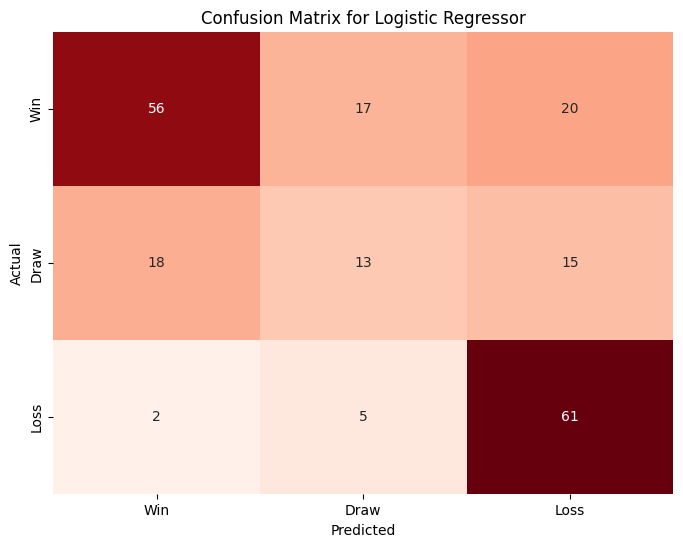

Classification Report:
----------------------
               precision    recall  f1-score   support

         Win       0.74      0.60      0.66        93
        Draw       0.37      0.28      0.32        46
        Loss       0.64      0.90      0.74        68

    accuracy                           0.63       207
   macro avg       0.58      0.59      0.58       207
weighted avg       0.62      0.63      0.61       207



In [168]:
cm = confusion_matrix(y_test_xgb, y_preds_LogR)
clr = classification_report(y_test_xgb, y_preds_LogR, target_names=["Win", "Draw", "Loss"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Reds', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regressor")
plt.savefig('LogisticRegressor-clr.png', dpi=100, bbox_inches='tight')
plt.show()


print("Classification Report:\n----------------------\n", clr)

## Results for SVC

/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


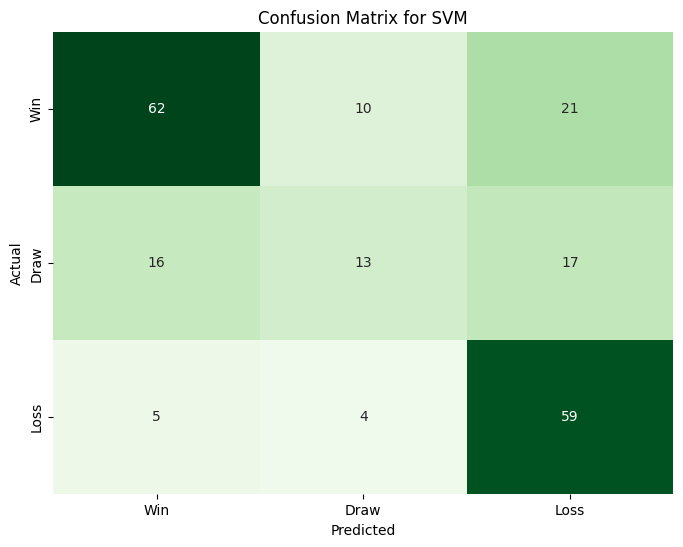

Classification Report:
----------------------
               precision    recall  f1-score   support

         Win       0.75      0.66      0.70        93
        Draw       0.00      0.00      0.00        46
        Loss       0.50      0.93      0.65        68

    accuracy                           0.60       207
   macro avg       0.42      0.53      0.45       207
weighted avg       0.50      0.60      0.53       207



In [169]:
y_pred_svc = clf_B.predict(X=X_test_xgb)

cm = confusion_matrix(y_test_xgb, y_pred_xgb)
clr = classification_report(y_test_xgb, y_pred_svc, target_names=["Win", "Draw", "Loss"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.savefig('SVM-clr.png', dpi=100, bbox_inches='tight')
plt.show()

print("Classification Report:\n----------------------\n", clr)

## Results for XGB

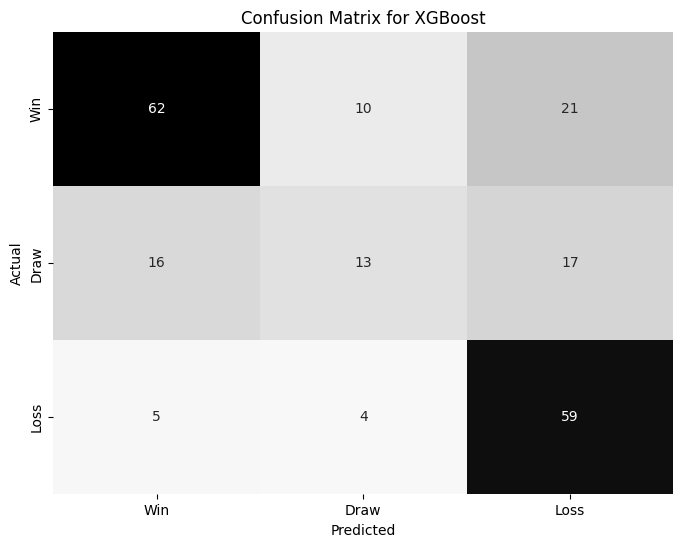

Classification Report:
----------------------
               precision    recall  f1-score   support

         Win       0.75      0.67      0.70        93
        Draw       0.48      0.28      0.36        46
        Loss       0.61      0.87      0.72        68

    accuracy                           0.65       207
   macro avg       0.61      0.61      0.59       207
weighted avg       0.64      0.65      0.63       207



In [174]:
xgb_model = xgb.XGBClassifier(seed=14)
xgb_model.fit(X=X_train_xgb, y=y_train_xgb)
y_pred_xgb = xgb_model.predict(X=X_test_xgb)

cm = confusion_matrix(y_test_xgb, y_pred_xgb)
clr = classification_report(y_test_xgb, y_pred_xgb, target_names=["Win", "Draw", "Loss"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Greys', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.savefig('XGBoost-clr.png', dpi=100, bbox_inches='tight')
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Hyper-parameter Tuning

In [172]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'reg_alpha':[1e-5]
             }  

# Initialize the classifier
clf = xgb.XGBClassifier(seed=14)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train_xgb,y_train_xgb)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train_xgb, y_train_xgb)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test_xgb, y_test_xgb)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=14, reg_alpha=1e-05, ...)
Made predictions in 0.0047 seconds.

------------------------------

F1 score and accuracy score for training set: 0.8340 , 0.8340.
Made predictions in 0.0028 seconds.

------------------------------

F1 score and accuracy score for test set: 0.6715 , 0.6715.


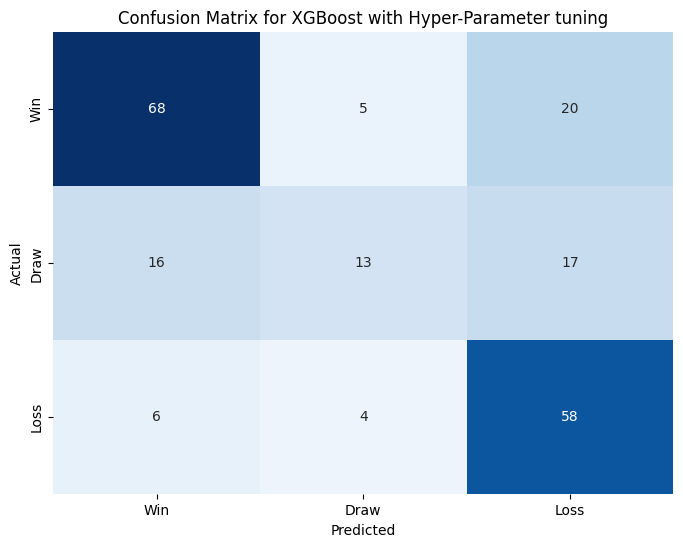

Classification Report:
----------------------
               precision    recall  f1-score   support

         Win       0.76      0.73      0.74        93
        Draw       0.59      0.28      0.38        46
        Loss       0.61      0.85      0.71        68

    accuracy                           0.67       207
   macro avg       0.65      0.62      0.61       207
weighted avg       0.67      0.67      0.65       207



In [175]:
y_preds = clf.predict(X=X_test_xgb)

cm = confusion_matrix(y_test_xgb, y_preds)
clr = classification_report(y_test_xgb, y_preds, target_names=["Win", "Draw", "Loss"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Win", "Draw", "Loss"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost with Hyper-Parameter tuning")
plt.savefig('XGBoost-Hyper-clr.png', dpi=100, bbox_inches='tight')
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Creating Neural Networks

In [ ]:
X_train.shape

In [ ]:
X_train = X_train_xgb
y_train = y_train_xgb
X_test = X_test_xgb
y_test = y_test_xgb

In [142]:
import tensorflow as tf

2022-09-22 19:42:36.084000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 19:42:37.139853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 19:42:37.140028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 19:42:37.175848: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 19:42:38.261941: W tensorflow/stream_executor/platform/de

In [172]:
X_train_values = X_train.values
X_test_values = X_test.values

In [211]:
X_test_values.shape

(207, 105)

In [249]:
X_train.shape

(482, 105)

In [180]:
OHE = OneHotEncoder()

In [215]:
y_train = pd.DataFrame(pd.get_dummies(y_train))
y_train

,0,1,2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
477,0,0,1
478,0,0,1
479,1,0,0
480,1,0,0


In [205]:
y_train = OHE.fit_transform(y_train)

In [206]:
y_train

<482x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1446 stored elements in Compressed Sparse Row format>

In [214]:
y_test = pd.DataFrame(pd.get_dummies(y_test))

In [ ]:
y_test = OHE.fit_transform(y_test)

In [267]:
losses = tf.keras.losses.CategoricalCrossentropy()

inputs = tf.keras.Input(shape=(105,))

x = tf.keras.layers.Embedding(
    input_dim=105,
    output_dim=64
)(inputs)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='tanh')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, input_shape=(105,), activation='relu'), 
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(3, activation='tanh')
# ])

model.compile(
    optimizer='adam',
    loss=losses,
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

print(model.summary())

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 105)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 105, 64)           6720      
                                                                 
 flatten_6 (Flatten)         (None, 6720)              0         
                                                                 
 dense_141 (Dense)           (None, 256)               1720576   
                                                                 
 dense_142 (Dense)           (None, 128)               32896     
                                                                 
 dense_143 (Dense)           (None, 64)                8256      
                                                                 
 dense_144 (Dense)           (None, 3)                 195

In [268]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'model_31/embedding_9/embedding_lookup' defined at (most recent call last):
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9284/1579785536.py", line 1, in <module>
      history = model.fit(
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/core/embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_31/embedding_9/embedding_lookup'
indices[30,6] = -1 is not in [0, 105)
	 [[{{node model_31/embedding_9/embedding_lookup}}]] [Op:__inference_train_function_79703]

In [252]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: {:.2f}%".format(results[1] * 100))
print("     AUC: {:.5f}".format(results[2]))


Accuracy: 59.90%
     AUC: 0.69846
